In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

## Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier. Now our loss function can't be the residuals. Our options are "deviance", or "exponential". Deviance is used for logistic regression, and we'll try that here.

In [3]:
# We will make 500 iterations, use 2-deep trees, and set our loss function. 
params = {'n_estimators': 500,
         'max_depth': 2,
         'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface. But they aren't quite a black box. We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

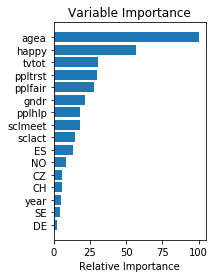

In [4]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance');

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

In [5]:
# Look at the available columns
df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

In [6]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X2 = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno', 'agea', 'happy', 'tvtot'])]

# Make the categorical variable 'country' into dummies.
X2 = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X2.shape[0] * 0.8)

# Put 80% of the data in the training set.
X2_train, y_train = X2[:offset], y[:offset]

# And put 20% in the test set.
X2_test, y_test = X2[offset:], y[offset:]

In [7]:
# We will make 800 iterations, use 4-deep trees, and set our loss function. 
params = {'n_estimators': 800,
         'max_depth': 4,
         'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X2_train, y_train)

predict_train = clf.predict(X2_train)
predict_test = clf.predict(X2_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.01258247659966242
Percent Type II errors: 0.08485499462943072

Test set accuracy:
Percent Type I errors: 0.0785276073619632
Percent Type II errors: 0.1736196319018405


In [8]:
# Make sure my model isn't overfitting
from sklearn.model_selection import GridSearchCV

# Set grid parameters
grid_params = {'n_estimators': [200, 500, 800, 1000],
         'max_depth': [2, 4, 6],}
# Use the grid
grid = GridSearchCV(clf, grid_params, cv=10, verbose=3)

#Fit the data
grid.fit(X2_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] max_depth=2, n_estimators=200 ...................................
[CV]  max_depth=2, n_estimators=200, score=0.7687595712098009, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=2, n_estimators=200, score=0.77947932618683, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=2, n_estimators=200, score=0.7438650306748467, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................
[CV]  max_depth=2, n_estimators=200, score=0.7147239263803681, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................
[CV]  max_depth=2, n_estimators=200, score=0.7177914110429447, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................
[CV]  max_depth=2, n_estimators=200, score=0.7818740399385561, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................
[CV]  max_depth=2, n_estimators=200, score=0.7818740399385561, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................
[CV]  max_depth=2, n_estimators=200, score=0.7327188940092166, total=   0.4s
[CV] max_depth=2, n_estimators=200 ...................................
[CV]  max_depth=2, n_estimators=200, score=0.738863287250384, total=   0.4s
[CV] max_depth=2, n_estimators=200 .

[CV]  max_depth=4, n_estimators=500, score=0.7419354838709677, total=   3.1s
[CV] max_depth=4, n_estimators=500 ...................................
[CV]  max_depth=4, n_estimators=500, score=0.6897081413210445, total=   2.6s
[CV] max_depth=4, n_estimators=800 ...................................
[CV]  max_depth=4, n_estimators=800, score=0.7381316998468607, total=   4.5s
[CV] max_depth=4, n_estimators=800 ...................................
[CV]  max_depth=4, n_estimators=800, score=0.7595712098009189, total=   4.5s
[CV] max_depth=4, n_estimators=800 ...................................
[CV]  max_depth=4, n_estimators=800, score=0.7269938650306749, total=   4.6s
[CV] max_depth=4, n_estimators=800 ...................................
[CV]  max_depth=4, n_estimators=800, score=0.5506134969325154, total=   4.6s
[CV] max_depth=4, n_estimators=800 ...................................
[CV]  max_depth=4, n_estimators=800, score=0.7101226993865031, total=   4.2s
[CV] max_depth=4, n_estimators=800 

[CV]  max_depth=6, n_estimators=1000, score=0.700920245398773, total=  13.5s
[CV] max_depth=6, n_estimators=1000 ..................................
[CV]  max_depth=6, n_estimators=1000, score=0.7357910906298003, total=  14.8s
[CV] max_depth=6, n_estimators=1000 ..................................
[CV]  max_depth=6, n_estimators=1000, score=0.738863287250384, total=  13.1s
[CV] max_depth=6, n_estimators=1000 ..................................
[CV]  max_depth=6, n_estimators=1000, score=0.706605222734255, total=  13.0s
[CV] max_depth=6, n_estimators=1000 ..................................
[CV]  max_depth=6, n_estimators=1000, score=0.7004608294930875, total=  13.0s
[CV] max_depth=6, n_estimators=1000 ..................................
[CV]  max_depth=6, n_estimators=1000, score=0.6789554531490015, total=  13.0s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  9.0min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=800,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500, 800, 1000], 'max_depth': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [9]:
#return best parameters and best score for training model.
print('Best parameters for training model:')
print(grid.best_params_)
print('Best Score for training model:')
print(grid.best_score_)

Best parameters for training model:
{'max_depth': 2, 'n_estimators': 200}
Best Score for training model:
0.7509590302286328


In [10]:
# Make sure model for test isn't overfitting
# Note: Should've renamed the grid variable to avoid confusion.
grid.fit(X2_test, y_test)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] max_depth=2, n_estimators=200 ...................................
[CV]  max_depth=2, n_estimators=200, score=0.6219512195121951, total=   0.1s
[CV] max_depth=2, n_estimators=200 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=2, n_estimators=200, score=0.5337423312883436, total=   0.1s
[CV] max_depth=2, n_estimators=200 ...................................
[CV]  max_depth=2, n_estimators=200, score=0.5521472392638037, total=   0.2s
[CV] max_depth=2, n_estimators=200 ...................................
[CV]  max_depth=2, n_estimators=200, score=0.8957055214723927, total=   0.2s
[CV] max_depth=2, n_estimators=200 ...................................
[CV]  max_depth=2, n_estimators=200, score=0.4294478527607362, total=   0.2s
[CV] max_depth=2, n_estimators=200 ...................................
[CV]  max_depth=2, n_estimators=200, score=0.6257668711656442, total=   0.2s
[CV] max_depth=2, n_estimators=200 ...................................
[CV]  max_depth=2, n_estimators=200, score=0.558282208588957, total=   0.2s
[CV] max_depth=2, n_estimators=200 ...................................
[CV]  max_depth=2, n_estimators=200, score=0.5460122699386503, total=   0.1s
[CV] max_depth=2, n_estimators=200 .

[CV]  max_depth=4, n_estimators=500, score=0.15950920245398773, total=   0.7s
[CV] max_depth=4, n_estimators=500 ...................................
[CV]  max_depth=4, n_estimators=500, score=0.2392638036809816, total=   0.7s
[CV] max_depth=4, n_estimators=500 ...................................
[CV]  max_depth=4, n_estimators=500, score=0.42592592592592593, total=   0.7s
[CV] max_depth=4, n_estimators=800 ...................................
[CV]  max_depth=4, n_estimators=800, score=0.6219512195121951, total=   1.1s
[CV] max_depth=4, n_estimators=800 ...................................
[CV]  max_depth=4, n_estimators=800, score=0.24539877300613497, total=   1.0s
[CV] max_depth=4, n_estimators=800 ...................................
[CV]  max_depth=4, n_estimators=800, score=0.17791411042944785, total=   1.3s
[CV] max_depth=4, n_estimators=800 ...................................
[CV]  max_depth=4, n_estimators=800, score=0.5276073619631901, total=   1.2s
[CV] max_depth=4, n_estimators=

[CV]  max_depth=6, n_estimators=1000, score=0.50920245398773, total=   2.5s
[CV] max_depth=6, n_estimators=1000 ..................................
[CV]  max_depth=6, n_estimators=1000, score=0.4601226993865031, total=   2.8s
[CV] max_depth=6, n_estimators=1000 ..................................
[CV]  max_depth=6, n_estimators=1000, score=0.6196319018404908, total=   2.6s
[CV] max_depth=6, n_estimators=1000 ..................................
[CV]  max_depth=6, n_estimators=1000, score=0.31901840490797545, total=   2.4s
[CV] max_depth=6, n_estimators=1000 ..................................
[CV]  max_depth=6, n_estimators=1000, score=0.1411042944785276, total=   2.2s
[CV] max_depth=6, n_estimators=1000 ..................................
[CV]  max_depth=6, n_estimators=1000, score=0.294478527607362, total=   2.5s
[CV] max_depth=6, n_estimators=1000 ..................................
[CV]  max_depth=6, n_estimators=1000, score=0.42592592592592593, total=   2.5s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.1min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=800,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500, 800, 1000], 'max_depth': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [11]:
#return best parameters and best score for test model.
print('Best parameters for test model:')
print(grid.best_params_)
print('Best Score for test model:')
print(grid.best_score_)

Best parameters for test model:
{'max_depth': 2, 'n_estimators': 200}
Best Score for test model:
0.5877300613496933


# Write Up
- I added in three more columns, happy, agea, and tvtot. Those were the top three variables that were related. 
- Adding iterations up to 800 and increasing the depth increased my accuracy on all ends except for the test set type I error, which increased 1%. However, all my other error types for the test and training model type decreased after I included three new features, increased the iteration count, and added more depth. 
- I wasn't sure about keeping 'cntry' inside the features. I felt like the dummies might have hurt my model's accuracy but it broke my model when I removed it.  
- Lastly, I ran a cross validation to make sure that my model's variables weren't overfitted.  The training model was somewhat consistent, but the test set accuracy dropped a fair amount. 
- I'm sure if I did a PCA on the features along with the gradient boosting, my model's accuracy would've increased.
- I used GridSearchCV to help me find the optimal parameters while making sure my model's variables weren't overfitting. The training model's accuracy is acceptable, but my testing model could be better. 